# **Proyecciones de empresas a un mes**

In [1]:
# Importando librerías
from main import *

## **Librerías y su propósito**

1. **OpenBB**
    - Sirve para obtener datos financieros en tiempo real, ya sean acciones, índices, ETFs y más.
    - Aquí se uso para descargar los precios históricos del ticker correspondiente y del S&P 500, necesarios para calcular retornos, volatilidad, beta, etc.

2. **Numpy**
    - Numpy es una librería de cálculo numérico.
        - Se usa para:
            - Logaritmos y operaciones vectorizadas (np.log).
            - Desviación estándar (std).
            - Generar números aleatorios (np.random.normal) para simulaciones Monte Carlo.
            - Cálculo de estadísticas como media, mediana y percentiles.

3. **Statsmodels**
    - Permite hacer análisis estadísticos avanzados, principalmente regresiones y tests estadísticos.
    - Aquí se usa para calcular la **beta** mediante una **regresión lineal OLS**, que es la base del modelo CAPM para estimar el rendimiento esperado de la acción.

---

## **Matemáticas empleadas**

1. **Retornos algorítmicos**
    - Se calculan como:

        $r_t = \ln \left( \frac{P_t}{P_{t-1}} \right)$

        donde $P_t$ es el precio de cierre del día $t$.

    - Esto convierte los precios en una serie aditiva y permite modelar el comportamiento como un **proceso estocástico**.

2. **Volatilidad histórica**
    - Desviación estándar de los retornos logarítmicos diarios:

        $\sigma_{diaria} = \mathrm{std} \left( r_t \right)$

    - Volatilidad anualizada:
        $\sigma_{anual} = \sigma_{diaria} * \sqrt{252}$

        donde 252 ≈ número de días de trading en un año.

3. **CAPM (Capital Asset Pricing Model)**
    - Regresión lineal para estimar **beta**:

        $r_{activo} = \alpha + \beta * r_{mercado} + \epsilon$

    - Rendimiento esperado según CAPM:

        $\mathbb{E}[R_{activo}] = R_f + \beta \left (\mathbb{E}[R_m] - R_f \right)$

        donde $R_f$ es la tasa libre de riesgo y $\mathbb{E}[R_m]$ el rendimiento esperado del mercado.

4. **Simulación Monte Carlo (GBM)**
    - Se usa un **Movimiento Browniano Geométrico (GBM por sus siglas en inglés)** para simular precios futuros:

        $S_T = S_0 * \exp \left ((\mu - \frac{1}{2} \sigma^2)T + \sigma\sqrt{T}Z \right)$

        - $S_0$ = Precio actual

        - $\mu$ = Rendimiento esperado

        - $\sigma$ = Volatilidad anual

        - $T$ = Horizonte temporal

        - $Z$ = Variable aleatoria normal

5. **Estadísticas de la simulación**

    - Media $\mathbb{E}[S_T]$, mediana y percentiles (P5, P95) para dar intervalos de confianza del precio futuro
    - Esto ayuda a visualizar la **distribución probable** de precios después de un mes de trading.

Acción: AAPL
Precio Actual: 254.6300048828125
Rendimiento E[S_T] probable 3.97%
E[S_T] ≈ 264.7475929868737
Mediana ≈ 264.72707539844413
P5 ≈ 258.8349900235178   P95 ≈ 270.72737374175614
Rendimiento P5: 1.65%  P95: 6.32%


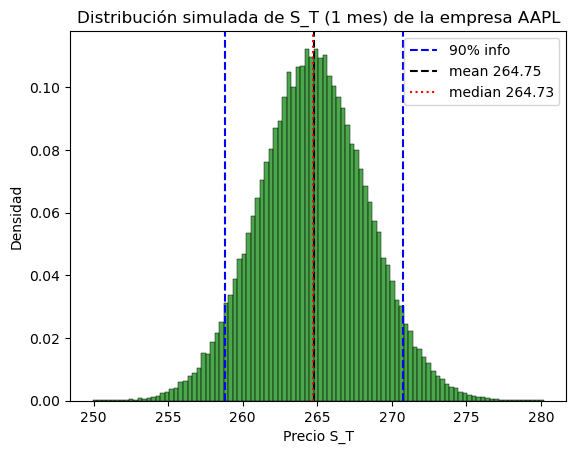

In [4]:
# Apple
monte_carlo("AAPL")

Acción: ACTINVRB.MX
Precio Actual: 19.3799991607666
Rendimiento E[S_T] probable 1.53%
E[S_T] ≈ 19.67656923069757
Mediana ≈ 19.675988444318886
P5 ≈ 19.2898915041548   P95 ≈ 20.067888853137767
Rendimiento P5: -0.46%  P95: 3.55%


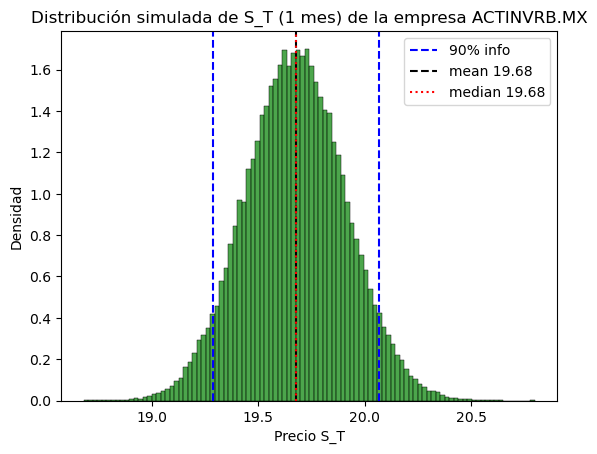

In [9]:
monte_carlo("ACTINVRB.MX")

Acción: AMZN
Precio Actual: 219.57000732421875
Rendimiento E[S_T] probable 4.9%
E[S_T] ≈ 230.32255948699995
Mediana ≈ 230.29112347665227
P5 ≈ 225.12556150473355   P95 ≈ 235.5837050074746
Rendimiento P5: 2.53%  P95: 7.29%


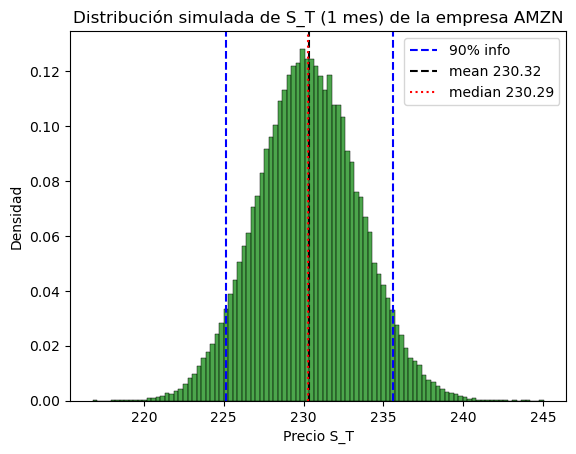

In [18]:
monte_carlo("AMZN")

Acción: BIMBOA.MX
Precio Actual: 65.04000091552734
Rendimiento E[S_T] probable 2.67%
E[S_T] ≈ 66.77578131422909
Mediana ≈ 66.7717055400027
P5 ≈ 65.44398338985586   P95 ≈ 68.12756454654128
Rendimiento P5: 0.62%  P95: 4.75%


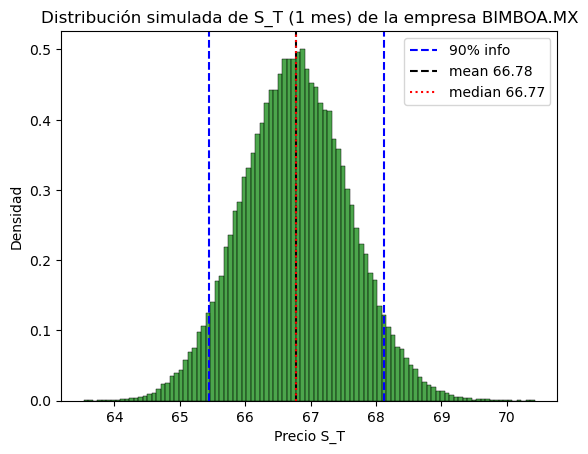

In [30]:
monte_carlo("BIMBOA.MX")

Acción: BOLSAA.MX
Precio Actual: 38.27000045776367
Rendimiento E[S_T] probable 2.68%
E[S_T] ≈ 39.29495792807491
Mediana ≈ 39.291756734972964
P5 ≈ 38.51023353405852   P95 ≈ 40.08795996752031
Rendimiento P5: 0.63%  P95: 4.75%


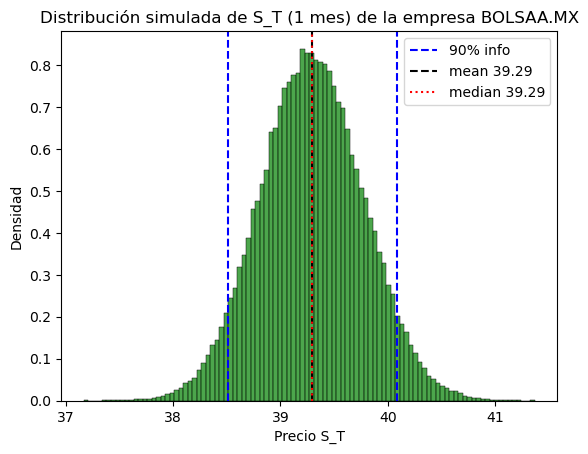

In [33]:
monte_carlo("BOLSAA.MX")

Acción: BRK-B
Precio Actual: 502.739990234375
Rendimiento E[S_T] probable 1.95%
E[S_T] ≈ 512.5532691542652
Mediana ≈ 512.529885648049
P5 ≈ 501.80186041309076   P95 ≈ 523.4279607690477
Rendimiento P5: -0.19%  P95: 4.12%


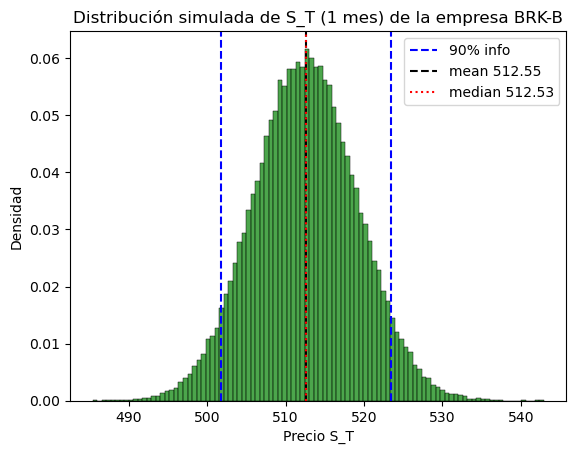

In [35]:
monte_carlo("BRK-B")